In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from utils import *

In [4]:
path = 'Data/AutoCorrData/'
filenames = [
    'N11_1_200_15_Bead_Bright_Particles_trajectories_sortedAutoCorrData.mat',
    'N11_1_200fixed_30_1umNaOH_Bead_Bright_Particles_trajectories_sortedAutoCorrData.mat',
    'N11_3_fixed200_50_Bead_Bright_Particles_trajectories_sortedAutoCorrData.mat',
    'N11_3_fixed250_15_Bead_Bright_Particles_trajectories_sortedAutoCorrData.mat',
    'N11_fixed250_15_Bead_Bright_Particles_trajectories_sortedAutoCorrData.mat', 
    'N13_2_100_fixed200_Bead_Bright_Particles_trajectories_sortedAutoCorrData.mat',
    'N17_1_250_30_Bead_Bright_Particles_trajectories_sortedAutoCorrData.mat'
]

corrs = list(map(lambda x: loadmat(x)['AutoCorr'], [path + f for f in filenames]))

(2, 9999)


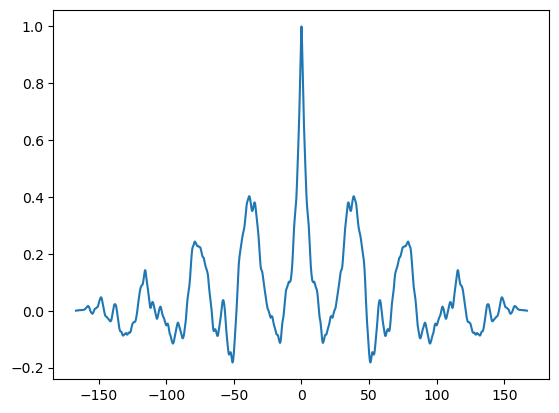

(2, 9999)


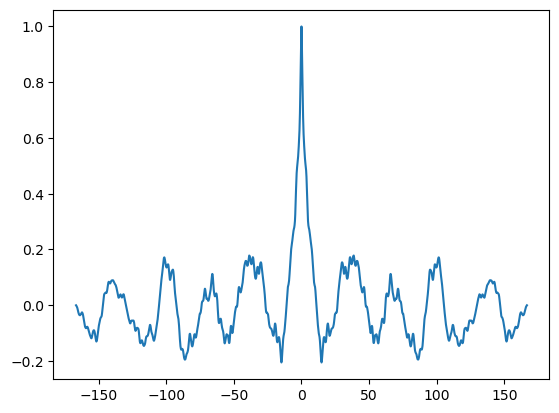

(2, 8999)


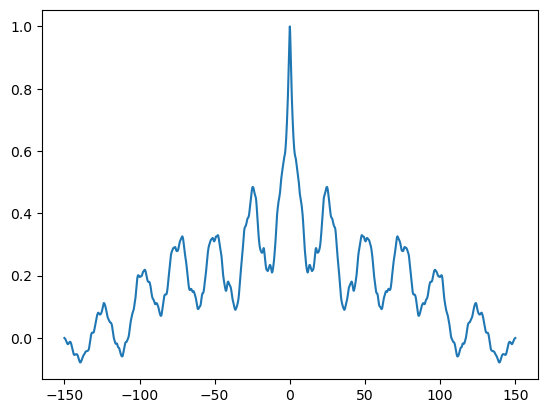

(2, 9999)


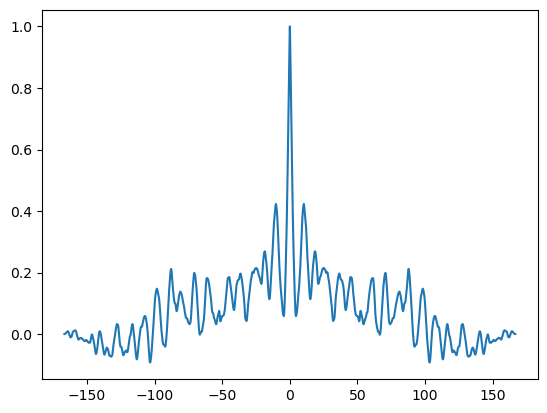

(2, 9999)


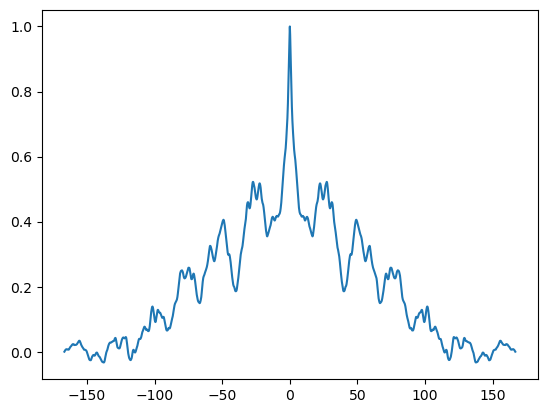

(2, 9999)


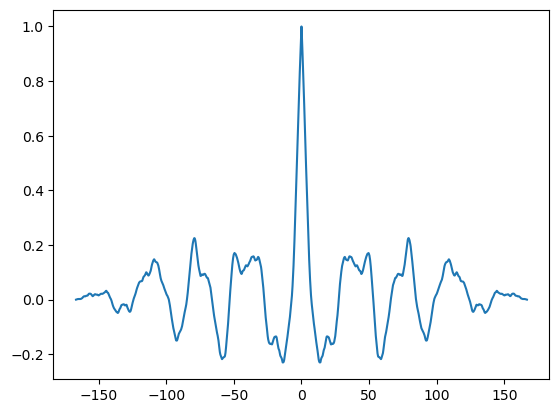

(2, 9999)


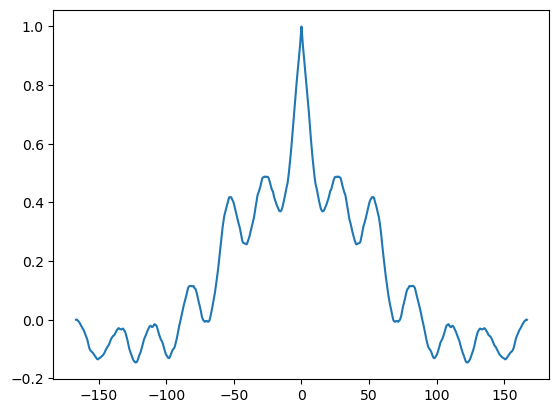

In [5]:
corr_stack = [] 

for corr in corrs: 
    print(corr.shape)
    plt.plot(corr[0], corr[1])
    plt.show()
    
    if corr.shape[-1] == 9999:
        corr_stack.append(corr[1])

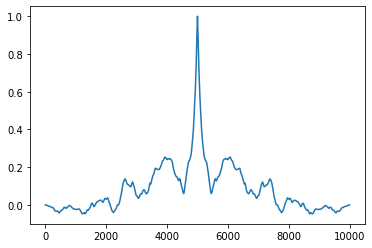

In [4]:
corr_mean = np.mean(corr_stack, axis=0)
plt.plot(corr_mean)
plt.show() 

In [6]:
path = 'Data/AutoCorrData2/'
filenames = [
    'N11/N11_1_200_15_Bead_Bright_Particles_trajectories_sorted_ThetaTime.mat',
    'N11/N11_1_200fixed_30_1umNaOH_Bead_Bright_Particles_trajectories_sorted_ThetaTime.mat',
    'N11/N11_3_fixed200_50_Bead_Bright_Particles_trajectories_sorted_ThetaTime.mat',
    'N11/N11_3_fixed250_15_Bead_Bright_Particles_trajectories_sorted_ThetaTime.mat',
    'N11/N11_fixed250_15_Bead_Bright_Particles_trajectories_sorted_ThetaTime.mat',
    'N13/N13_2_100_fixed200_Bead_Bright_Particles_trajectories_sorted_ThetaTime.mat',
    'N14/N14_1_200fixed_30_1umNaOH_Bead_Bright_Particles_trajectories_sorted_ThetaTime.mat',
    'N17/N17_1_250_30_Bead_Bright_Particles_trajectories_sorted_ThetaTime.mat'
]

theta_trajs = [loadmat(path+f)['THETAd'] for f in filenames]
L_min = min(map(len, theta_trajs))

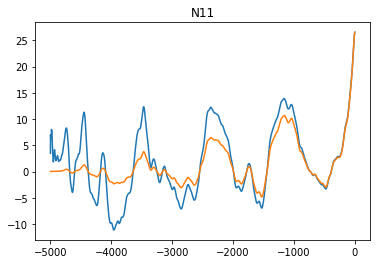

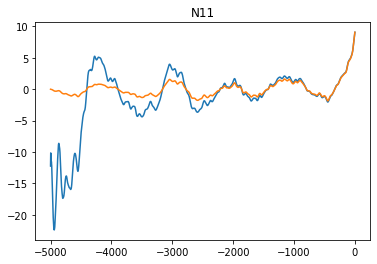

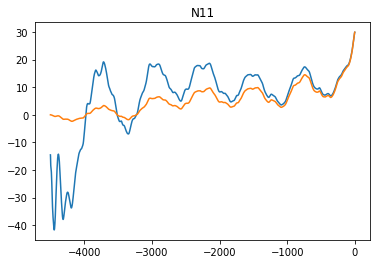

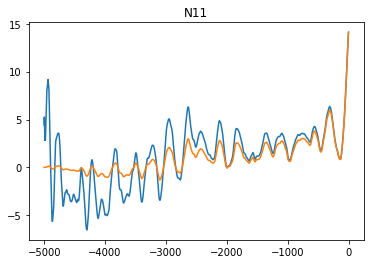

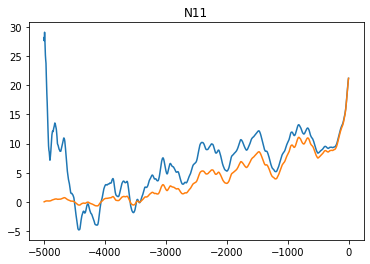

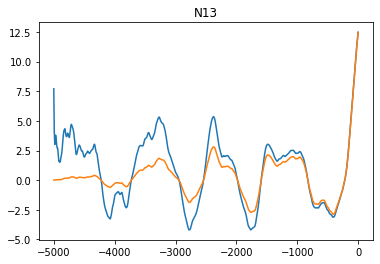

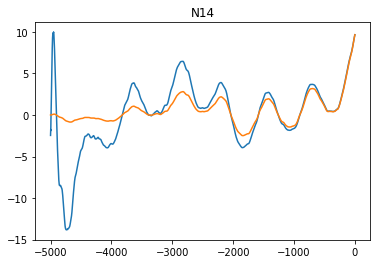

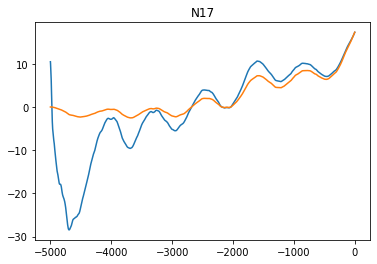

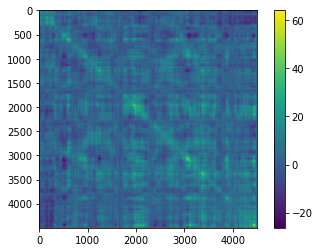

In [7]:
corr = np.zeros((L_min, L_min))
auto_corrs = [] 
for (i, traj) in enumerate(theta_trajs):
    thetas = traj[:, 1]
    L = thetas.size
    auto_corr = find_auto_corr(thetas)
    plt.plot(np.arange(-L, 0), auto_corr)
    plt.plot(np.arange(-L, 0), np.correlate(thetas, thetas, mode='full')[:L]/L)
    plt.title(filenames[i][:3])
    plt.show()
    
    if i < 5: 
        auto_corrs.append(auto_corr[-L_min:])
    
    corr += np.outer(thetas[:L_min], thetas[:L_min])

plt.imshow(corr/len(theta_trajs))
plt.colorbar() 
plt.show()

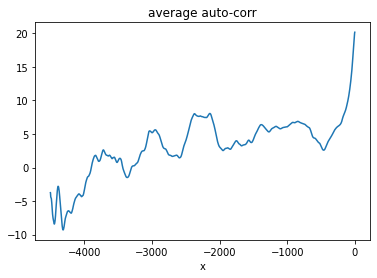

In [13]:
plt.plot(np.arange(-L_min, 0), np.mean(auto_corrs, axis=0))
plt.xlabel('x')
plt.title('average auto-corr')
plt.show() 

(5000, 2)


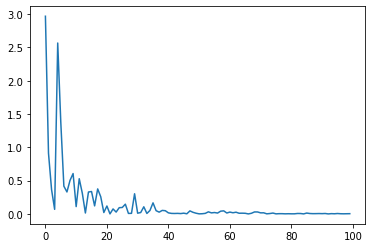

(5000, 2)


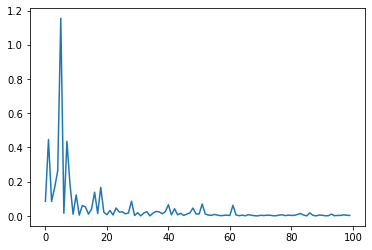

(4500, 2)


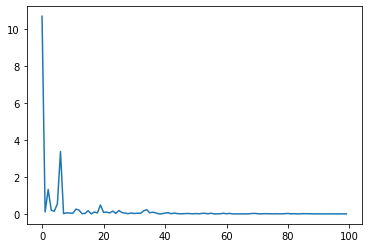

(5000, 2)


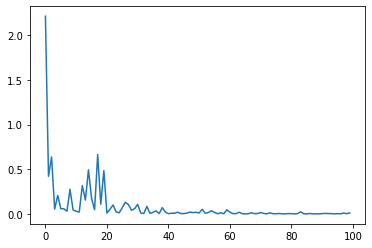

(5000, 2)


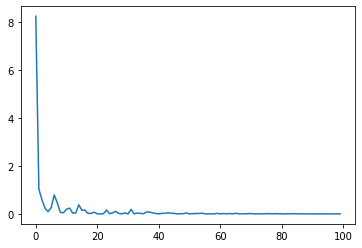

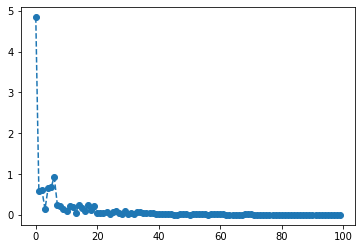

In [23]:
c = 0 
for traj in theta_trajs[:5]: 
    print(traj.shape)
    plt.plot(((np.abs(np.fft.fft(traj[:, 1]))/traj.shape[0])**2)[:100])
    plt.show() 
    
    c += ((np.abs(np.fft.fft(traj[:, 1]))/traj.shape[0])**2)[:100]
    
    
plt.plot(c/5, 'o--')
plt.show() 
    
    